In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import math
import matplotlib.pyplot as plt

dFA/dV=rA #this is kmol/m^3/s <br>
rA=-k*CA<br>
CA0=3 #kmol/m^3<br>
V from 0, 10 m^3<br>

In [2]:
#This function is to return the values of the 2 derivatives for the reaction A => B with first order kinetics
def  ODEfun(V,Yfuncvec):#fun(t,y) and return dy/dt
    FA = Yfuncvec[0]
    FB = Yfuncvec[1]
    flow=2 #m^3/s
    CA=FA/flow #kmol/m^3
    CB=FB/flow
    k=2 #1/s
    rA=-k*CA #kmol/s/m^3
    dFAdV = rA #Differential mole balance on A 
    dFBdV = -rA #Differential mole balance on B
     
    dYfuncvecdV = [dFAdV,dFBdV] 
    return dYfuncvecdV 

In [3]:
#test of function dFA/dV=rA etc.
tspan = (0,10) # Range for the independent variable 
F0 = [3,0] # Initial values for the dependent variables
sol=ODEfun(tspan,F0)
print (sol)

[-3.0, 3.0]


In [4]:
#test of solve function 

sol=solve_ivp(ODEfun,tspan,F0)
print (sol)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 92
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 3.33222241e-04, 3.66544465e-03, 3.69876687e-02,
       3.70209909e-01, 1.14398662e+00, 2.02835232e+00, 2.95829539e+00,
       3.89553337e+00, 4.83454849e+00, 5.77552178e+00, 6.72106487e+00,
       7.67786195e+00, 8.66134894e+00, 9.70305182e+00, 1.00000000e+01])
 t_events: None
        y: array([[3.00000000e+00, 2.99900050e+00, 2.98902379e+00, 2.89106406e+00,
        2.07176941e+00, 9.55826025e-01, 3.94932434e-01, 1.55944047e-01,
        6.11315018e-02, 2.39218166e-02, 9.34282011e-03, 3.63236512e-03,
        1.39651458e-03, 5.22873311e-04, 1.84805161e-04, 1.37325527e-04],
       [0.00000000e+00, 9.99500185e-04, 1.09762053e-02, 1.08935944e-01,
        9.28230587e-01, 2.04417398e+00, 2.60506757e+00, 2.84405595e+00,
        2.93886850e+00, 2.97607818e+00, 2.99065718e+00, 2.99636763e+00,
     

In [5]:
print(sol.t)# This prints the values of V

[0.00000000e+00 3.33222241e-04 3.66544465e-03 3.69876687e-02
 3.70209909e-01 1.14398662e+00 2.02835232e+00 2.95829539e+00
 3.89553337e+00 4.83454849e+00 5.77552178e+00 6.72106487e+00
 7.67786195e+00 8.66134894e+00 9.70305182e+00 1.00000000e+01]


In [6]:
print(sol.y) # This prints the values for FA and FB

[[3.00000000e+00 2.99900050e+00 2.98902379e+00 2.89106406e+00
  2.07176941e+00 9.55826025e-01 3.94932434e-01 1.55944047e-01
  6.11315018e-02 2.39218166e-02 9.34282011e-03 3.63236512e-03
  1.39651458e-03 5.22873311e-04 1.84805161e-04 1.37325527e-04]
 [0.00000000e+00 9.99500185e-04 1.09762053e-02 1.08935944e-01
  9.28230587e-01 2.04417398e+00 2.60506757e+00 2.84405595e+00
  2.93886850e+00 2.97607818e+00 2.99065718e+00 2.99636763e+00
  2.99860349e+00 2.99947713e+00 2.99981519e+00 2.99986267e+00]]


In [7]:
print('prints FA')
print(sol.y[0])
print('prints FB')
print(sol.y[1])


prints FA
[3.00000000e+00 2.99900050e+00 2.98902379e+00 2.89106406e+00
 2.07176941e+00 9.55826025e-01 3.94932434e-01 1.55944047e-01
 6.11315018e-02 2.39218166e-02 9.34282011e-03 3.63236512e-03
 1.39651458e-03 5.22873311e-04 1.84805161e-04 1.37325527e-04]
prints FB
[0.00000000e+00 9.99500185e-04 1.09762053e-02 1.08935944e-01
 9.28230587e-01 2.04417398e+00 2.60506757e+00 2.84405595e+00
 2.93886850e+00 2.97607818e+00 2.99065718e+00 2.99636763e+00
 2.99860349e+00 2.99947713e+00 2.99981519e+00 2.99986267e+00]


In [8]:
numrows=len(sol.t)
flow=2 #m^3/s
X=np.zeros(numrows) #declares an array that we will fill in the for loop below
CA=np.zeros(numrows)
CB=np.zeros(numrows)

print('                     Summary of Results\n')

print('\nSolution ')
print('   V         FA         FB         CA         CB         X  ')
print('  (m^3)   (kmol/s)   (kmol/s)  (kmol/m^3) (kmol/m^3)  ')

#FA = sol.y[0,row]  from Yfuncvec[0]
#FB = sol.y[1,row] from Yfuncvec[1]
#X=(FA0-FA)/FA0
row=0
for row in range(numrows):
    X[row]=(sol.y[0][0]-sol.y[0][row])/sol.y[0][0]
    CA[row]=sol.y[0,row]/flow
    CB[row]=sol.y[1,row]/flow
    print('{:4.4f} {:10.4f} {:10.4f} {:10.4f} {:10.4f} {:10.4f} '
          .format(sol.t[row],sol.y[0,row],sol.y[1,row],CA[row],CB[row],X[row] ))



                     Summary of Results


Solution 
   V         FA         FB         CA         CB         X  
  (m^3)   (kmol/s)   (kmol/s)  (kmol/m^3) (kmol/m^3)  
0.0000     3.0000     0.0000     1.5000     0.0000     0.0000 
0.0003     2.9990     0.0010     1.4995     0.0005     0.0003 
0.0037     2.9890     0.0110     1.4945     0.0055     0.0037 
0.0370     2.8911     0.1089     1.4455     0.0545     0.0363 
0.3702     2.0718     0.9282     1.0359     0.4641     0.3094 
1.1440     0.9558     2.0442     0.4779     1.0221     0.6814 
2.0284     0.3949     2.6051     0.1975     1.3025     0.8684 
2.9583     0.1559     2.8441     0.0780     1.4220     0.9480 
3.8955     0.0611     2.9389     0.0306     1.4694     0.9796 
4.8345     0.0239     2.9761     0.0120     1.4880     0.9920 
5.7755     0.0093     2.9907     0.0047     1.4953     0.9969 
6.7211     0.0036     2.9964     0.0018     1.4982     0.9988 
7.6779     0.0014     2.9986     0.0007     1.4993     0.9995 
8.6613     0.

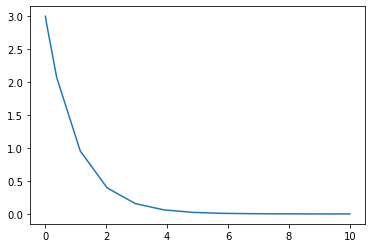

In [9]:
#This is a simple plot
plt.plot(sol.t,sol.y[0])

Text(0, 0.5, 'Concentration (kmol/m^3)')

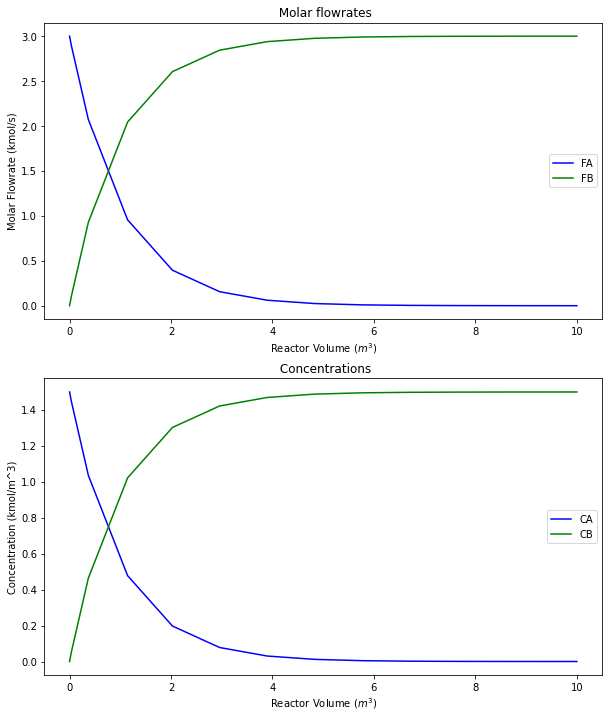

In [10]:
#print plots or graphs

#plot the data
plt.figure(figsize=(10,12))

plt.subplot (2,1,1)
plt.plot(sol.t,sol.y[0],'b',label='FA')
plt.plot(sol.t,sol.y[1],'g',label='FB')
#plt.plot(sol.t,sol.y[2],'r',label='FC')

plt.legend()
plt.title(' Molar flowrates')
plt.xlabel('Reactor Volume ($m^3$)')
plt.ylabel('Molar Flowrate (kmol/s)')

plt.subplot (2,1,2)
plt.plot(sol.t,CA,'b',label='CA')
plt.plot(sol.t,CB,'g',label='CB')


plt.legend()
plt.title(' Concentrations')
plt.xlabel('Reactor Volume ($m^3$)')
plt.ylabel('Concentration (kmol/m^3)')


In [11]:
teval=np.linspace(tspan[0],tspan[1])
print(teval)

[ 0.          0.20408163  0.40816327  0.6122449   0.81632653  1.02040816
  1.2244898   1.42857143  1.63265306  1.83673469  2.04081633  2.24489796
  2.44897959  2.65306122  2.85714286  3.06122449  3.26530612  3.46938776
  3.67346939  3.87755102  4.08163265  4.28571429  4.48979592  4.69387755
  4.89795918  5.10204082  5.30612245  5.51020408  5.71428571  5.91836735
  6.12244898  6.32653061  6.53061224  6.73469388  6.93877551  7.14285714
  7.34693878  7.55102041  7.75510204  7.95918367  8.16326531  8.36734694
  8.57142857  8.7755102   8.97959184  9.18367347  9.3877551   9.59183673
  9.79591837 10.        ]


In [12]:
#makes a smoother line by using more values
numrows=100
teval=np.linspace(tspan[0],tspan[1],numrows)
y0 = [10., 0] # Initial values for the dependent variables
sol=solve_ivp(ODEfun,tspan,y0,t_eval=teval)
print (sol)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 92
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.6565656

In [13]:
print(numrows)

100


Text(0, 0.5, 'Concentration (kmol/m^3)')

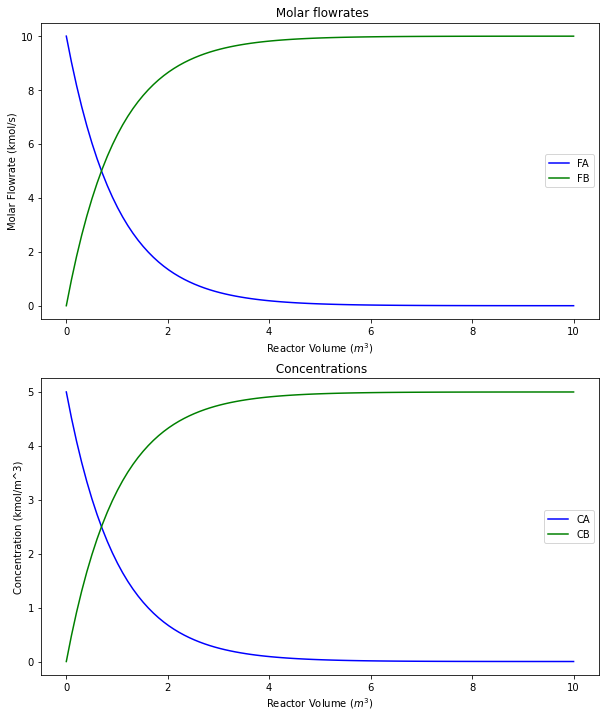

In [14]:
#We need more values for X, CA and CB so we need to refill the arrays
numrows=len(sol.t)
flow=2 #m^3/s
X=np.zeros(numrows) #declares an array that we will fill in the for loop below
CA=np.zeros(numrows)
CB=np.zeros(numrows)
row=0
for row in range(numrows):
    X[row]=(sol.y[0][0]-sol.y[0][row])/sol.y[0][0]
    CA[row]=sol.y[0,row]/flow
    CB[row]=sol.y[1,row]/flow
#print plots or graphs

#plot the data
plt.figure(figsize=(10,12))

plt.subplot (2,1,1)
plt.plot(sol.t,sol.y[0],'b',label='FA')
plt.plot(sol.t,sol.y[1],'g',label='FB')


plt.legend()
plt.title(' Molar flowrates')
plt.xlabel('Reactor Volume ($m^3$)')
plt.ylabel('Molar Flowrate (kmol/s)')

plt.subplot (2,1,2)
plt.plot(sol.t,CA,'b',label='CA')
plt.plot(sol.t,CB,'g',label='CB')


plt.legend()
plt.title(' Concentrations')
plt.xlabel('Reactor Volume ($m^3$)')
plt.ylabel('Concentration (kmol/m^3)')
